# 6.5: Unsupervised Machine Learning: Clustering


## This Notebook has the following contents

## 01. Importing libraries and Data

## 02. Cleaning and getting data ready

## 03. Using the elbow technique

## 04. K-MEANS clustering

# 01. Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans  # here you import the kmeans algorithm from scikit-learn
import pylab as pl  # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining path
path = r'C:\Users\hiron\Documents\191124_FIFA22_analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Derived Data', 'df_cleaned.csv'), index_col = False)

# 02. Cleaning and getting data ready

In [5]:
# Select only numerical columns
n_df = df.select_dtypes(include=['number'])

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
n_df.head()

,sofifa_id,overall,potential,value(Millions),wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119.5,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125.5,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN


In [9]:
# Convert 'wage_eur' to thousands and rename the column
if 'wage_eur' in n_df.columns:
    n_df['wage_eur'] = n_df['wage_eur'] / 1000  # Convert to thousands
    n_df.rename(columns={'wage_eur': 'wage(thousands)'}, inplace=True)

In [10]:
n_df.head()

,sofifa_id,overall,potential,value(Millions),wage(thousands),age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78.0,320.0,34,170,72,73.0,1.0,30.0,2023.0,52,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119.5,270.0,32,185,81,21.0,1.0,9.0,2023.0,37,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45.0,270.0,36,187,83,11.0,1.0,7.0,2023.0,38,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129.0,270.0,29,175,68,73.0,1.0,10.0,2025.0,54,5,5,5,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125.5,350.0,30,181,70,10.0,1.0,17.0,2025.0,7,5,4,4,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN


### Creating a clean version of numerical columns and dropping not needed columns

In [11]:
# Dropping columns not needed
dfn = n_df.drop(columns=['sofifa_id', 'club_contract_valid_until','release_clause_eur','goalkeeping_speed',])

In [12]:
dfn.head()

,overall,potential,value(Millions),wage(thousands),age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,93,78.0,320.0,34,170,72,73.0,1.0,30.0,52,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,92,92,119.5,270.0,32,185,81,21.0,1.0,9.0,37,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,91,91,45.0,270.0,36,187,83,11.0,1.0,7.0,38,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,91,91,129.0,270.0,29,175,68,73.0,1.0,10.0,54,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,91,91,125.5,350.0,30,181,70,10.0,1.0,17.0,7,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


In [13]:
# Count the number of NaN values in each column
nan_counts = dfn.isna().sum()

# Display the result
print(nan_counts)

overall                           0
potential                         0
value(Millions)                   0
wage(thousands)                   0
age                               0
height_cm                         0
weight_kg                         0
club_team_id                      0
league_level                      0
club_jersey_number                0
nationality_id                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
pace                           2124
shooting                       2124
passing                        2124
dribbling                      2124
defending                      2124
physic                         2124
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy           

In [14]:
# Drop rows with NaN values in the specified columns
dfn = dfn.dropna(subset=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'])

In [15]:
dfn.head()

,overall,potential,value(Millions),wage(thousands),age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,93,78.0,320.0,34,170,72,73.0,1.0,30.0,52,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,92,92,119.5,270.0,32,185,81,21.0,1.0,9.0,37,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,91,91,45.0,270.0,36,187,83,11.0,1.0,7.0,38,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,91,91,129.0,270.0,29,175,68,73.0,1.0,10.0,54,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,91,91,125.5,350.0,30,181,70,10.0,1.0,17.0,7,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


# 03. Using the elbow technique

In [16]:
dfn.shape

(17041, 54)

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(dfn).score(dfn) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-50414003804114.45,
 -177755483159.6601,
 -52400763950.71576,
 -17615527310.738544,
 -13165120156.110949,
 -5669357627.110992,
 -4078330986.446701,
 -2358170689.731045,
 -1642879721.5536106]

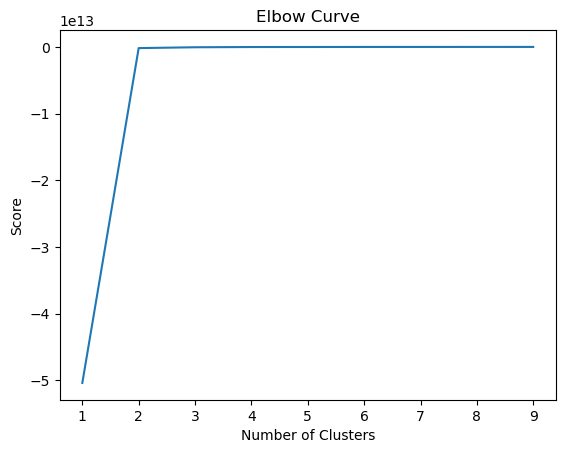

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### In this case, there's a large jump from one to two on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is two

# 04. K-MEANS clustering

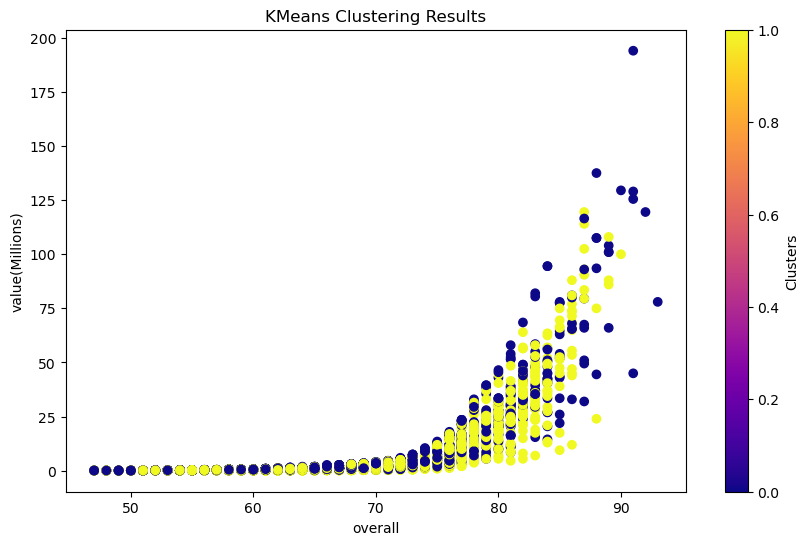

In [20]:
# Step 1: Preprocess the DataFrame
# Drop rows with NaN values
dfn_cleaned = dfn.dropna()

# Select features for clustering
features = dfn_cleaned[['overall','value(Millions)','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

# Step 2: Perform K-Means Clustering
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model and predict cluster labels
clustering_result = kmeans.fit_predict(features)

# Add the cluster labels to the cleaned DataFrame
dfn_cleaned['clusters'] = clustering_result

# Step 3: Visualize the Clustering Results
# Create a scatter plot for visualization (using 'overall' and 'value(Millions)' as axes)
plt.figure(figsize=(10, 6))
plt.scatter(dfn_cleaned['overall'], dfn_cleaned['value(Millions)'], c=dfn_cleaned['clusters'], cmap='plasma')
plt.title('KMeans Clustering Results')
plt.xlabel('overall')
plt.ylabel('value(Millions)')
plt.colorbar(label='Clusters')
plt.show()

## The K-Means clustering graph shows a clear positive correlation between "overall" ratings and "value (Millions)," with value increasing exponentially as overall ratings improve. The clusters, represented by a gradient color scale, segment players into groups based on these features. Lower overall ratings (50–70) correspond to low values, while higher ratings (above 80) are associated with significantly higher values. The exponential trend highlights that small improvements in overall ratings at higher levels lead to disproportionately large increases in value. Outliers, such as players with extremely high values, stand out from their respective clusters and may represent exceptional cases.


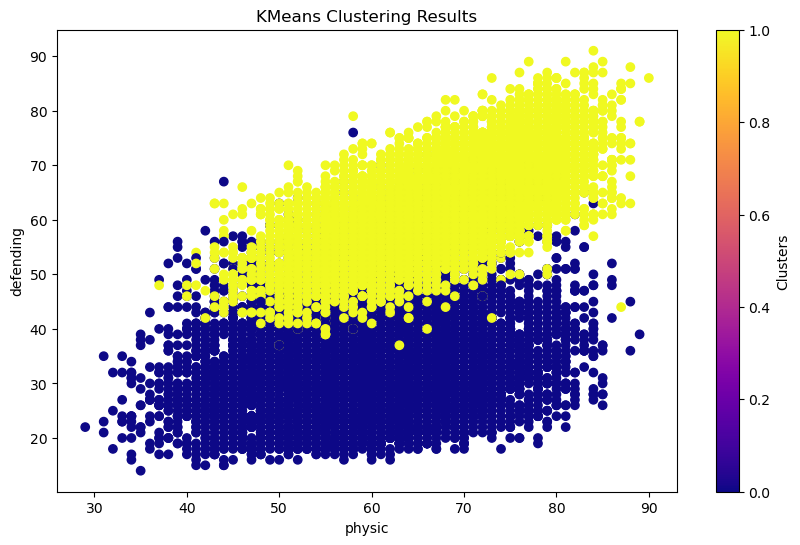

In [21]:
# Step 3: Visualize the Clustering Results
# Create a scatter plot for visualization (using 'physic' and 'defending' as axes)
plt.figure(figsize=(10, 6))
plt.scatter(dfn_cleaned['physic'], dfn_cleaned['defending'], c=dfn_cleaned['clusters'], cmap='plasma')
plt.title('KMeans Clustering Results')
plt.xlabel('physic')
plt.ylabel('defending')
plt.colorbar(label='Clusters')
plt.show()

## Cluster Distribution: The graph divides the dataset into two clusters, represented by yellow and blue points. These clusters are based on the features "physic" (x-axis) and "defending" (y-axis).
## Cluster Characteristics: The yellow cluster contains data points with higher "physic" and "defending" values, indicating players with stronger physical and defensive abilities. In contrast, the blue cluster represents players with lower values in these attributes.


## Feature Correlation: There is a positive correlation between "physic" and "defending," as both clusters show an upward trend in these features.
## Cluster Overlap: Some overlap exists in the mid-range of both features, particularly between 50-70 for "physic" and 40-60 for "defending," suggesting intermediate profiles.
## Segmentation Insight: The clustering effectively segments players into two categories—likely defensive specialists (yellow) and less defensively oriented players (blue).
## This analysis provides a clear understanding of how players can be categorized based on their physical and defensive attributes, with potential applications in sports analytics and player profiling.siling.

# Descriptive stastistics from the clusters

In [23]:
dfn_cleaned.head()

,overall,potential,value(Millions),wage(thousands),age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nationality_id,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,clusters
0,93,93,78.0,320.0,34,170,72,73.0,1.0,30.0,52,4,4,5,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0
1,92,92,119.5,270.0,32,185,81,21.0,1.0,9.0,37,4,4,5,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0
2,91,91,45.0,270.0,36,187,83,11.0,1.0,7.0,38,4,5,5,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0
3,91,91,129.0,270.0,29,175,68,73.0,1.0,10.0,54,5,5,5,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0
4,91,91,125.5,350.0,30,181,70,10.0,1.0,17.0,7,5,4,4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0


In [24]:
dfn_cleaned.loc[dfn_cleaned['clusters'] == 1, 'cluster'] = 'yellow'
dfn_cleaned.loc[dfn_cleaned['clusters'] == 0, 'cluster'] = 'blue'

In [25]:
dfn_cleaned.groupby('cluster').agg({'overall':['mean', 'median'], 
                         'value(Millions)':['mean', 'median'], 
                         'physic':['mean', 'median'],
                          'defending':['mean', 'median']})

overall        value(Millions)            physic         defending  \
              mean median            mean median       mean median       mean   
cluster                                                                         
blue     65.940139   66.0        3.357137  1.100  60.061283   60.0  35.585810   
yellow   65.923361   66.0        2.689570  0.975  68.151579   69.0  63.008893   

                
        median  
cluster         
blue      34.0  
yellow    63.0

## Key Insights
The blue cluster represents players with moderate physical abilities and weak defending skills but includes some high-value players.
The yellow cluster consists of players with strong physical and defensive attributes but generally lower market values.
Both clusters have similar overall ratings, suggesting that their differences lie more in specific skill attributes than in general performancue).

## This segmentation could help identify defensive specialists (yellow) versus more versatile or offensive-oriented players (blue).

In [26]:
# Export Data
dfn_cleaned.to_csv(os.path.join(path, '02 Data', 'Derived Data', 'FIFA_numerical_cleaned.csv'), index=False)